In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/train.csv')
test_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/test.csv')

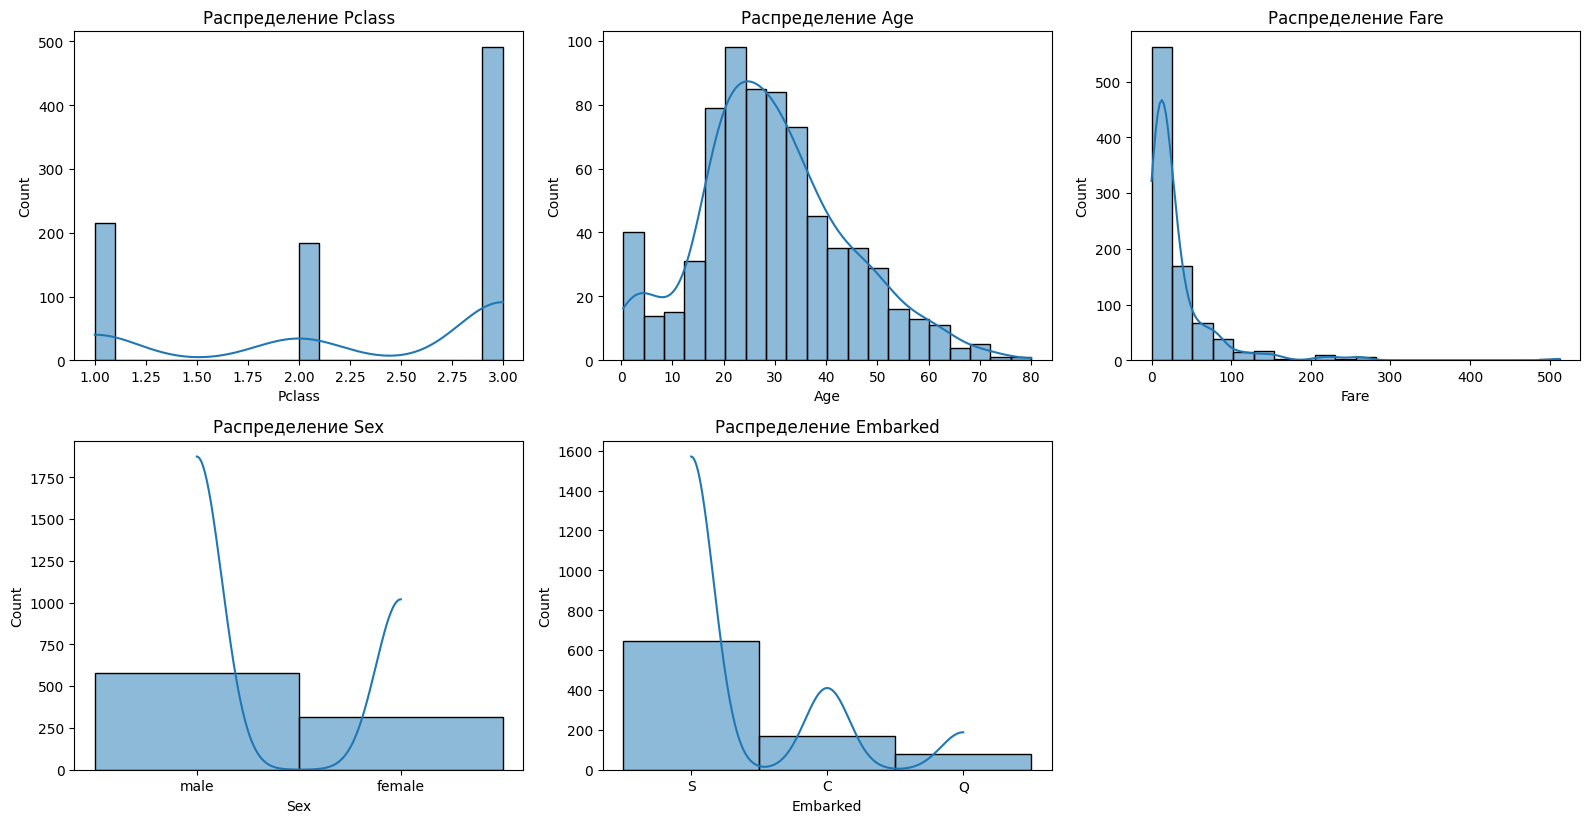

In [3]:
def plot_distributions(data):
    features = data.columns
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[feature], kde=True, bins=20)
        plt.title(f"Распределение {feature}")
    plt.tight_layout()
    plt.show()

plot_distributions(train_data[['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']])


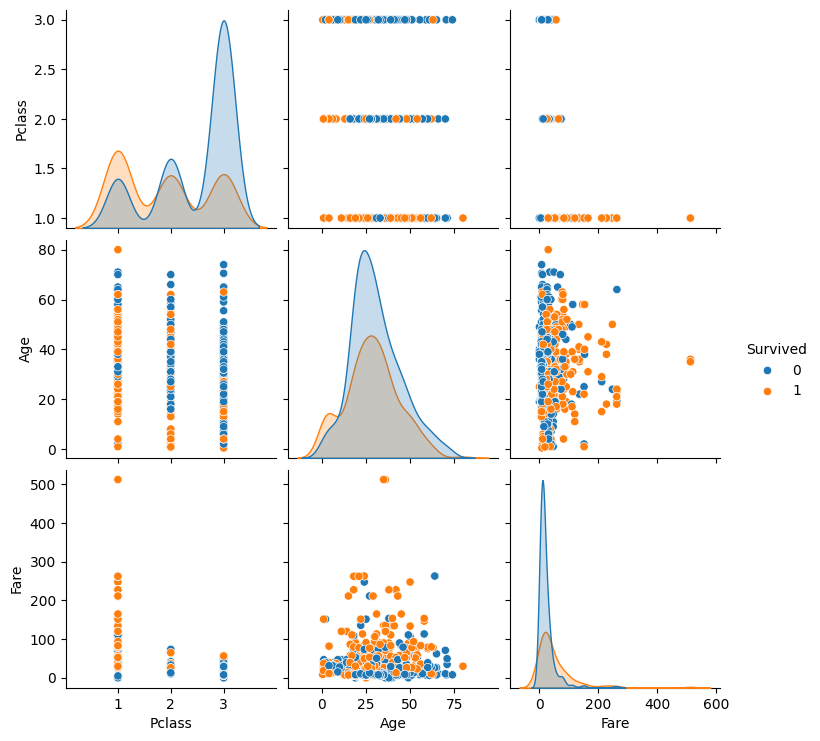

In [4]:
sns.pairplot(train_data[['Pclass', 'Age', 'Fare', 'Survived']].dropna(), hue='Survived', diag_kind='kde')
plt.show()

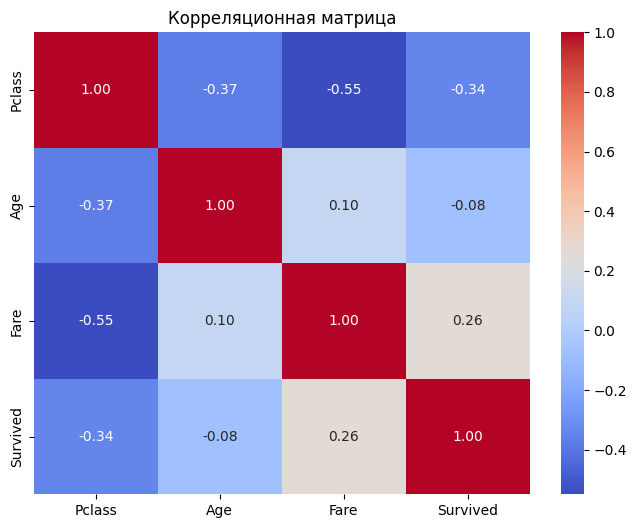

In [5]:
correlation_matrix = train_data[['Pclass', 'Age', 'Fare', 'Survived']].corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
report_path = '/Users/pahan/Desktop/Basics-of-Static-Training/reports/eda_report.txt'

with open(report_path, 'w') as report_file:
    report_file.write("Отчёт по разведочному анализу данных (EDA)\n")
    report_file.write("=" * 50 + "\n\n")
    report_file.write("1. Распределение признаков:\n")
    for feature in ['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']:
        report_file.write(f"- {feature}: {train_data[feature].describe()}\n\n")

    report_file.write("2. Корреляционная матрица:\n")
    report_file.write(correlation_matrix.to_string())